#### Introduction
today we are investigating new york taxicab data to see if we can reveal any insights. First we should have a brief look at the data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# MatPlotLib Style
# plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('data.csv')
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-01-01 00:29:24,2016-01-01 00:39:36,N,1,-73.928642,40.680611,-73.924278,40.698044,1,...,8.0,0.5,0.5,1.86,0.0,NaN,0.3,11.16,1,1.0
1,2,2016-01-01 00:19:39,2016-01-01 00:39:18,N,1,-73.952675,40.723175,-73.923920,40.761379,1,...,15.5,0.5,0.5,0.00,0.0,NaN,0.3,16.80,2,1.0
2,2,2016-01-01 00:19:33,2016-01-01 00:39:48,N,1,-73.971611,40.676105,-74.013161,40.646072,1,...,16.5,0.5,0.5,4.45,0.0,NaN,0.3,22.25,1,1.0
3,2,2016-01-01 00:22:12,2016-01-01 00:38:32,N,1,-73.989502,40.669579,-74.000648,40.689034,1,...,13.5,0.5,0.5,0.00,0.0,NaN,0.3,14.80,2,1.0
4,2,2016-01-01 00:24:01,2016-01-01 00:39:22,N,1,-73.964729,40.682854,-73.940720,40.663013,1,...,12.0,0.5,0.5,0.00,0.0,NaN,0.3,13.30,2,1.0


We have 1445285 rows and 19 column.
1442308

In [4]:
df.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.445285e+06,1.445285e+06,1.445285e+06,1.445285e+06,1.445285e+06,1.445285e+06,1.445285e+06,1.445285e+06,1.445285e+06,1.445285e+06,1.445285e+06,1.445285e+06,1.445285e+06,0.0,1.445285e+06,1.445285e+06,1.445285e+06,1.445283e+06
mean,1.781941e+00,1.097067e+00,-7.381009e+01,4.067522e+01,-7.381805e+01,4.067843e+01,1.360637e+00,2.757192e+00,1.194466e+01,3.475314e-01,4.860920e-01,1.248817e+00,9.968433e-02,NaN,2.916495e-01,1.441838e+01,1.517152e+00,1.022774e+00
std,4.129281e-01,6.163103e-01,3.091071e+00,1.697484e+00,2.979353e+00,1.635611e+00,1.029732e+00,2.953487e+00,1.051256e+01,3.740171e-01,8.824990e-02,2.777279e+00,1.183991e+00,NaN,5.269119e-02,1.201146e+01,5.267786e-01,1.491826e-01
min,1.000000e+00,1.000000e+00,-1.151813e+02,0.000000e+00,-1.151789e+02,0.000000e+00,0.000000e+00,0.000000e+00,-4.928000e+02,-1.000000e+00,-5.000000e-01,-6.700000e+00,-3.000000e+01,NaN,-3.000000e-01,-4.975000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.396053e+01,4.069370e+01,-7.396776e+01,4.069477e+01,1.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,7.800000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394639e+01,4.074584e+01,-7.394553e+01,4.074571e+01,1.000000e+00,1.800000e+00,9.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.116000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391827e+01,4.080022e+01,-7.391198e+01,4.078822e+01,1.000000e+00,3.450000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.730000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.316801e+01,0.000000e+00,4.269479e+01,9.000000e+00,3.605000e+02,9.890000e+02,8.300000e+01,3.000000e+00,4.000000e+02,9.000000e+02,NaN,1.390000e+00,1.000800e+03,5.000000e+00,2.000000e+00


#### The Data
We need to convert this data into useful features. In order to do this I will investigate each column to see what I can learn.

* Pickup and Dropoff - this is probably too much information, we should claculate trip length time and store hours and minutes only.
* Store and Forward - Y or N flag, change to binary values.
* VendorID - This value can only be 1 or 2, representing the LPEP provider, Creative Mobile Technologies and Verifone respectively. My Intuition says that this provider is simply collecting the data and will make no difference. Action to remove.
* RateCodeID - special rates, 1 - 6 representing Standard Rate, JFK, Newark, Nassau or Westchester, Negotiated Fare, Group Ride. These could be useful for clustering later on. Action, one hot encode these.
* Pickup/Dropoff_longitude and latitude. These are very useful for this project. Actions to calculate if pickup and drop off are within New York, also action to calculate trip distance, however this is already a feature so this is not needed. Remove Nulls too.
* Passenger_count - A driver entered value, from 1 to 9. 
* Trip distance - good for clustering, no engineering to be done.
* Fare amount - varies wildy, there are even some negative values. Action, these should potentially be removed.
* Extra - Misc extras and surcharges, should only include 0.5 or 1.0 rush hour and overnight charges.
* MTA_tax - 0.5 tax that is automatically triggered. Action, Tax should not be negative.
* Tip_amount - credit card tips only, not cash. Action Tip should not be negative.
* Tolls_amount - Total amount of Tolls paid on a trip. Action, Toll should not be negative.
* Ehail_fee - No information about what this is. Action, remove this column.
* Improvement_surcharge - 0.3 improvement surchage, there are some anomalies here.
* Total_amount - Total amount charged to passengers.
* Payment_type - value between 1-6 referring to Credit Card, Cash, No charge, dispute, Unknown, Voided trip. We should one hot encode these as some algorithms may not deal with this feature correctly.
* Trip_type - Code indicating whether street-hail or dispatch, 1-2. no anomalies.

#### To Do
* 1 - [DONE]Remove VendorID.
* 2 - [DONE]One hot encode RateCodeID.
* 3 - Calculate whether or not pickup and drop off are within New York, if they aren't drop them.
* 4 - [DONE]Remove negative Fare amounts.
* 5 - [DONE]Remove negative Tax. 
* 6 - [DONE]Remove negative Tips.
* 7 - [DONE]Remove negative Tolls. 
* 8 - [DONE]Remove Ehail-fee.
* 9 - [DONE]Remove non-valid improvement_surcharge, these should be only 0, or 0.30.
* 10 - [DONE]One hot Encode Payment_Type.
* 11 - [DONE]one hot encode Trip_type.
* 12 - [DONE]create trip length feature.
* 13 - [DONE]Time hour and minute features, then drop pickup and dropoff times.
* 14 - [DONE]Store and Fwd flag to binary.

In [5]:
# drop VendorID and Ehail_fee
df = df.drop(['VendorID', 'Ehail_fee'], axis=1)
df.head()

,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2016-01-01 00:29:24,2016-01-01 00:39:36,N,1,-73.928642,40.680611,-73.924278,40.698044,1,1.46,8.0,0.5,0.5,1.86,0.0,0.3,11.16,1,1.0
1,2016-01-01 00:19:39,2016-01-01 00:39:18,N,1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,15.5,0.5,0.5,0.00,0.0,0.3,16.80,2,1.0
2,2016-01-01 00:19:33,2016-01-01 00:39:48,N,1,-73.971611,40.676105,-74.013161,40.646072,1,3.79,16.5,0.5,0.5,4.45,0.0,0.3,22.25,1,1.0
3,2016-01-01 00:22:12,2016-01-01 00:38:32,N,1,-73.989502,40.669579,-74.000648,40.689034,1,3.01,13.5,0.5,0.5,0.00,0.0,0.3,14.80,2,1.0
4,2016-01-01 00:24:01,2016-01-01 00:39:22,N,1,-73.964729,40.682854,-73.940720,40.663013,1,2.55,12.0,0.5,0.5,0.00,0.0,0.3,13.30,2,1.0


In [6]:
# Remove Negative values where they shouldn't be
fare_less_than_zero = df['Fare_amount'] >= 0
MTA_less_than_zero = df['MTA_tax'] >= 0
tip_less_than_zero = df['Tip_amount'] >= 0
tolls_less_than_zero = df['Tolls_amount'] >= 0
rows_to_keep = fare_less_than_zero & MTA_less_than_zero & tip_less_than_zero & tolls_less_than_zero

df = df[rows_to_keep]
df.head()

,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2016-01-01 00:29:24,2016-01-01 00:39:36,N,1,-73.928642,40.680611,-73.924278,40.698044,1,1.46,8.0,0.5,0.5,1.86,0.0,0.3,11.16,1,1.0
1,2016-01-01 00:19:39,2016-01-01 00:39:18,N,1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,15.5,0.5,0.5,0.00,0.0,0.3,16.80,2,1.0
2,2016-01-01 00:19:33,2016-01-01 00:39:48,N,1,-73.971611,40.676105,-74.013161,40.646072,1,3.79,16.5,0.5,0.5,4.45,0.0,0.3,22.25,1,1.0
3,2016-01-01 00:22:12,2016-01-01 00:38:32,N,1,-73.989502,40.669579,-74.000648,40.689034,1,3.01,13.5,0.5,0.5,0.00,0.0,0.3,14.80,2,1.0
4,2016-01-01 00:24:01,2016-01-01 00:39:22,N,1,-73.964729,40.682854,-73.940720,40.663013,1,2.55,12.0,0.5,0.5,0.00,0.0,0.3,13.30,2,1.0


There were 2977 records with a negative Fares, Tax, Tip or Toll amounts. These have now been removed.

In [7]:
# Remove non-valid improvement_surcharge, these should be only 0, or 0.30.
thirty_improvement_surcharge = df['improvement_surcharge'] == 0.3
zero_improvement_surcharge = df['improvement_surcharge'] == 0
valid_improvement_surcharge = thirty_improvement_surcharge | zero_improvement_surcharge
df = df[valid_improvement_surcharge]
df.head()

,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2016-01-01 00:29:24,2016-01-01 00:39:36,N,1,-73.928642,40.680611,-73.924278,40.698044,1,1.46,8.0,0.5,0.5,1.86,0.0,0.3,11.16,1,1.0
1,2016-01-01 00:19:39,2016-01-01 00:39:18,N,1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,15.5,0.5,0.5,0.00,0.0,0.3,16.80,2,1.0
2,2016-01-01 00:19:33,2016-01-01 00:39:48,N,1,-73.971611,40.676105,-74.013161,40.646072,1,3.79,16.5,0.5,0.5,4.45,0.0,0.3,22.25,1,1.0
3,2016-01-01 00:22:12,2016-01-01 00:38:32,N,1,-73.989502,40.669579,-74.000648,40.689034,1,3.01,13.5,0.5,0.5,0.00,0.0,0.3,14.80,2,1.0
4,2016-01-01 00:24:01,2016-01-01 00:39:22,N,1,-73.964729,40.682854,-73.940720,40.663013,1,2.55,12.0,0.5,0.5,0.00,0.0,0.3,13.30,2,1.0


There were 67 invalid improvement surcharges.

In [8]:
df['lpep_pickup_datetime'] = df['lpep_pickup_datetime'].apply(lambda x: pd.Timestamp(x))
df['Lpep_dropoff_datetime'] = df['Lpep_dropoff_datetime'].apply(lambda x: pd.Timestamp(x))
df['journey_in_seconds'] = (df['Lpep_dropoff_datetime']-df['lpep_pickup_datetime']).astype('timedelta64[s]')

In [9]:
df['pickup_hour'] = df['lpep_pickup_datetime'].apply(lambda x: x.hour)
df = df.drop(['lpep_pickup_datetime', 'Lpep_dropoff_datetime'], axis=1)
df.head()

,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,journey_in_seconds,pickup_hour
0,N,1,-73.928642,40.680611,-73.924278,40.698044,1,1.46,8.0,0.5,0.5,1.86,0.0,0.3,11.16,1,1.0,612.0,0
1,N,1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,15.5,0.5,0.5,0.00,0.0,0.3,16.80,2,1.0,1179.0,0
2,N,1,-73.971611,40.676105,-74.013161,40.646072,1,3.79,16.5,0.5,0.5,4.45,0.0,0.3,22.25,1,1.0,1215.0,0
3,N,1,-73.989502,40.669579,-74.000648,40.689034,1,3.01,13.5,0.5,0.5,0.00,0.0,0.3,14.80,2,1.0,980.0,0
4,N,1,-73.964729,40.682854,-73.940720,40.663013,1,2.55,12.0,0.5,0.5,0.00,0.0,0.3,13.30,2,1.0,921.0,0


In [10]:
df['store_and_fwd'] = df['Store_and_fwd_flag'] == 'Y'
df['not_store_and_fwd'] = df['Store_and_fwd_flag'] == 'N'
df = df.drop(['Store_and_fwd_flag'], axis=1)
df.head()

,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,journey_in_seconds,pickup_hour,store_and_fwd,not_store_and_fwd
0,1,-73.928642,40.680611,-73.924278,40.698044,1,1.46,8.0,0.5,0.5,1.86,0.0,0.3,11.16,1,1.0,612.0,0,False,True
1,1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,15.5,0.5,0.5,0.00,0.0,0.3,16.80,2,1.0,1179.0,0,False,True
2,1,-73.971611,40.676105,-74.013161,40.646072,1,3.79,16.5,0.5,0.5,4.45,0.0,0.3,22.25,1,1.0,1215.0,0,False,True
3,1,-73.989502,40.669579,-74.000648,40.689034,1,3.01,13.5,0.5,0.5,0.00,0.0,0.3,14.80,2,1.0,980.0,0,False,True
4,1,-73.964729,40.682854,-73.940720,40.663013,1,2.55,12.0,0.5,0.5,0.00,0.0,0.3,13.30,2,1.0,921.0,0,False,True


In [11]:
# One hot encode RateCodeID
df['RC_Standard_rate'] = df['RateCodeID'] == 1
df['RC_JFK'] = df['RateCodeID'] == 2
df['RC_Newark'] = df['RateCodeID'] == 3
df['RC_Nassau_or_Westchester'] = df['RateCodeID'] == 4
df['RC_Negotiated'] = df['RateCodeID'] == 5
df['RC_Group'] = df['RateCodeID'] == 6
df = df.drop(['RateCodeID'], axis=1)
df.head()

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,...,journey_in_seconds,pickup_hour,store_and_fwd,not_store_and_fwd,RC_Standard_rate,RC_JFK,RC_Newark,RC_Nassau_or_Westchester,RC_Negotiated,RC_Group
0,-73.928642,40.680611,-73.924278,40.698044,1,1.46,8.0,0.5,0.5,1.86,...,612.0,0,False,True,True,False,False,False,False,False
1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,15.5,0.5,0.5,0.00,...,1179.0,0,False,True,True,False,False,False,False,False
2,-73.971611,40.676105,-74.013161,40.646072,1,3.79,16.5,0.5,0.5,4.45,...,1215.0,0,False,True,True,False,False,False,False,False
3,-73.989502,40.669579,-74.000648,40.689034,1,3.01,13.5,0.5,0.5,0.00,...,980.0,0,False,True,True,False,False,False,False,False
4,-73.964729,40.682854,-73.940720,40.663013,1,2.55,12.0,0.5,0.5,0.00,...,921.0,0,False,True,True,False,False,False,False,False


In [12]:
# One hot encode payment_type
df['PT_credit_card'] = df['Payment_type'] == 1
df['PT_cash'] = df['Payment_type'] == 2
df['PT_no_charge'] = df['Payment_type'] == 3
df['PT_dispute'] = df['Payment_type'] == 4
df['PT_unknown'] = df['Payment_type'] == 5
df['PT_voided'] = df['Payment_type'] == 6
df = df.drop(['Payment_type'], axis=1)
df.head()

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,...,RC_Newark,RC_Nassau_or_Westchester,RC_Negotiated,RC_Group,PT_credit_card,PT_cash,PT_no_charge,PT_dispute,PT_unknown,PT_voided
0,-73.928642,40.680611,-73.924278,40.698044,1,1.46,8.0,0.5,0.5,1.86,...,False,False,False,False,True,False,False,False,False,False
1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,15.5,0.5,0.5,0.00,...,False,False,False,False,False,True,False,False,False,False
2,-73.971611,40.676105,-74.013161,40.646072,1,3.79,16.5,0.5,0.5,4.45,...,False,False,False,False,True,False,False,False,False,False
3,-73.989502,40.669579,-74.000648,40.689034,1,3.01,13.5,0.5,0.5,0.00,...,False,False,False,False,False,True,False,False,False,False
4,-73.964729,40.682854,-73.940720,40.663013,1,2.55,12.0,0.5,0.5,0.00,...,False,False,False,False,False,True,False,False,False,False


In [13]:
df['TT_street_hail'] = df['Trip_type '] == 1.0
df['TT_dispatch'] = df['Trip_type '] == 2.0
df = df.drop(['Trip_type '], axis=1)
df.head()

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,...,RC_Negotiated,RC_Group,PT_credit_card,PT_cash,PT_no_charge,PT_dispute,PT_unknown,PT_voided,TT_street_hail,TT_dispatch
0,-73.928642,40.680611,-73.924278,40.698044,1,1.46,8.0,0.5,0.5,1.86,...,False,False,True,False,False,False,False,False,True,False
1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,15.5,0.5,0.5,0.00,...,False,False,False,True,False,False,False,False,True,False
2,-73.971611,40.676105,-74.013161,40.646072,1,3.79,16.5,0.5,0.5,4.45,...,False,False,True,False,False,False,False,False,True,False
3,-73.989502,40.669579,-74.000648,40.689034,1,3.01,13.5,0.5,0.5,0.00,...,False,False,False,True,False,False,False,False,True,False
4,-73.964729,40.682854,-73.940720,40.663013,1,2.55,12.0,0.5,0.5,0.00,...,False,False,False,True,False,False,False,False,True,False


#### Lat Lons
There is an issue called for in the brief for this project that asks us to remove outside of New York latlongs. An issue here is that we don't have any definition of what is or is not New York. I have investigated Googles Geo APIs which could help us with this, however they are paid and in my eyes will not add much to this project.

#### Finding Outliers
* 1 [DONE]Pickup Longitude
* 2 [DONE]Pickup Latitude
* 3 [DONE]Dropoff Longtitude
* 4 [DONE]Dropoff Latitude
* 5 [DONE]Trip distance
* 6 [DONE]Fare Amount
* 7 [DONE]Tip Amount
* 8 Journey in seconds

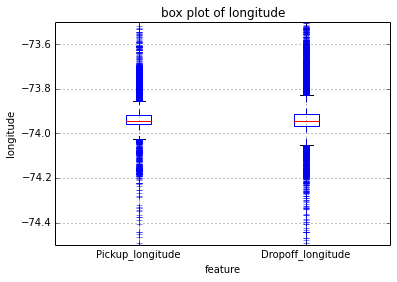

In [25]:
longitude = df[['Pickup_longitude', 'Dropoff_longitude']]
%matplotlib inline 
ax = longitude.boxplot()
ax.set_xlabel('feature')
ax.set_ylabel('longitude')
ax.set_ylim((-74.5,-73.5))
ax.set_title('box plot of longitude')

plt.show()

#### Longitude
The majority of the data for these points is just under between -74 and -73.8, the question is how many outliers do we keep, some of these outliers go as far as Philadelphia so we probably do need to take a smaller slice if we care about New York only. Action, slice from -73.6 to -74.2.

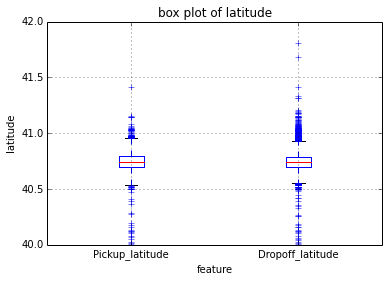

In [28]:
longitude = df[['Pickup_latitude', 'Dropoff_latitude']]
%matplotlib inline 
ax = longitude.boxplot()
ax.set_xlabel('feature')
ax.set_ylabel('latitude')
ax.set_ylim((40,42))
ax.set_title('box plot of latitude')

plt.show()

#### Latitude
We do need to take a smaller slice if we care about New York only. Action, slice from 40.5 to 41.

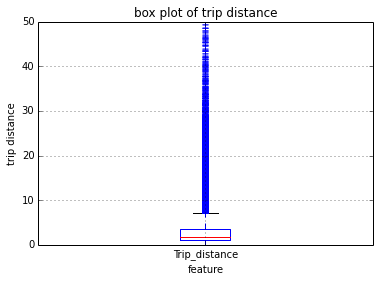

In [30]:
longitude = df[['Trip_distance']]
%matplotlib inline 
ax = longitude.boxplot()
ax.set_xlabel('feature')
ax.set_ylabel('trip distance')
ax.set_ylim((0,50))
ax.set_title('box plot of trip distance')

plt.show()

#### Trip Distance
The Trip distance is the number of miles of the journey. According to Wikipedia Manhatten is 13.4 miles (21.6 km) long and 2.3 miles (3.7 km) wide. so we should probably keep any trip less than about 15 miles if we are only interested in manhatten size trips.

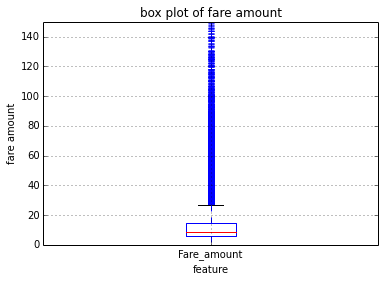

In [33]:
longitude = df[['Fare_amount']]
%matplotlib inline 
ax = longitude.boxplot()
ax.set_xlabel('feature')
ax.set_ylabel('fare amount')
ax.set_ylim((0,150))
ax.set_title('box plot of fare amount')

plt.show()

#### Fare Amount
We should probably keep any trip less than about 150 USD if we are only interested in manhatten size trips.

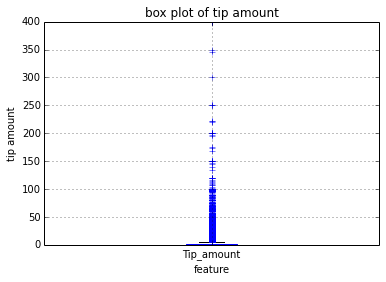

In [34]:
longitude = df[['Tip_amount']]
%matplotlib inline 
ax = longitude.boxplot()
ax.set_xlabel('feature')
ax.set_ylabel('tip amount')
# ax.set_ylim((0,150))
ax.set_title('box plot of tip amount')

plt.show()

#### Tip Amount
There are a lot of suspiciously high tips. This may be rare, but it does not invalidate trips.

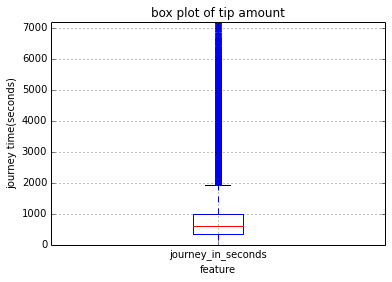

In [36]:
longitude = df[['journey_in_seconds']]
%matplotlib inline 
ax = longitude.boxplot()
ax.set_xlabel('feature')
ax.set_ylabel('journey time(seconds)')
ax.set_ylim((0,7200))
ax.set_title('box plot of tip amount')

plt.show()

#### Journey time
Most journeys are less than 1000 sconds (about 17 minutes), however journeys can be as long as 90000 seconds (about 60 days). This is clearly invalid data. but leaves us asking the question, what is an invalid journey? This system is clearly not being used correclty. I would suggest trimming any longer than 90 minutes.